In [7]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# load model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")

model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-large-960h-lv60-self", torch_dtype=torch.float16, attn_implementation="flash_attention_2").to(device)

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
import torchaudio

wave = torchaudio.load("cv-corpus-18.0-delta-2024-06-14-th/cv-corpus-18.0-delta-2024-06-14/th/clips/common_voice_th_40196204.mp3")[0].to(device)

In [9]:
import matplotlib.pyplot as plt

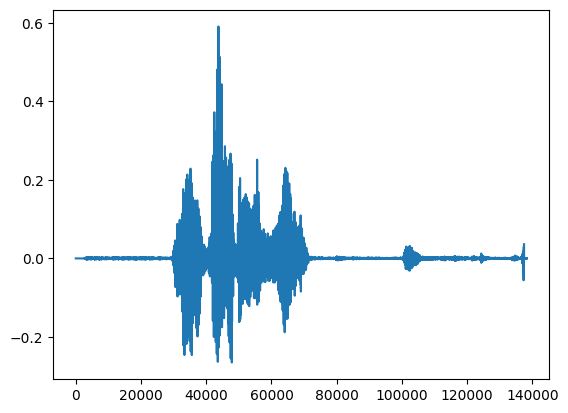

In [10]:
plt.plot(wave[0].cpu().numpy())
plt.show()

In [35]:
inputs = processor(wave[0], return_tensors="pt", sampling_rate=16000).input_values.type(torch.float16).to(device)
x = model(inputs).last_hidden_state

In [36]:
x

tensor([[[ 0.0225, -0.1354,  0.1876,  ...,  0.1025, -0.0460,  0.1786],
         [ 0.0214, -0.1337,  0.1866,  ...,  0.1016, -0.0461,  0.1786],
         [ 0.0210, -0.1348,  0.1869,  ...,  0.1019, -0.0457,  0.1787],
         ...,
         [-0.0598, -0.1497,  0.1195,  ...,  0.1366,  0.0597,  0.2094],
         [-0.0310, -0.1901,  0.0498,  ...,  0.1669,  0.0276,  0.2113],
         [ 0.0538,  0.0129, -0.2344,  ..., -0.1108, -0.1708,  0.2032]]],
       device='cuda:0', dtype=torch.float16, grad_fn=<NativeLayerNormBackward0>)

In [38]:
pred = torch.argmax(x, dim=-1)

In [40]:
transcription = processor.batch_decode(pred)

In [46]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from datasets import load_dataset
import torch

# load model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
    
# load dummy dataset and read soundfiles
ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")

# tokenize
input_values = processor(wave[0], return_tensors="pt", padding="longest").input_values

# retrieve logits
logits = model(input_values).logits

# take argmax and decode
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

Some weights of the model checkpoint at facebook/wav2vec2-large-960h-lv60-self were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.maske

In [47]:
transcription

['THETAOER']